In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

In [2]:
df_train = pd.read_csv(r"C:\Users\Admin\Downloads\mobile_train.csv")
df_test = pd.read_csv(r"C:\Users\Admin\Downloads\mobile_test.csv")

In [3]:
df_train.shape

(2000, 21)

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0.5, 1.0, 'Correlation')

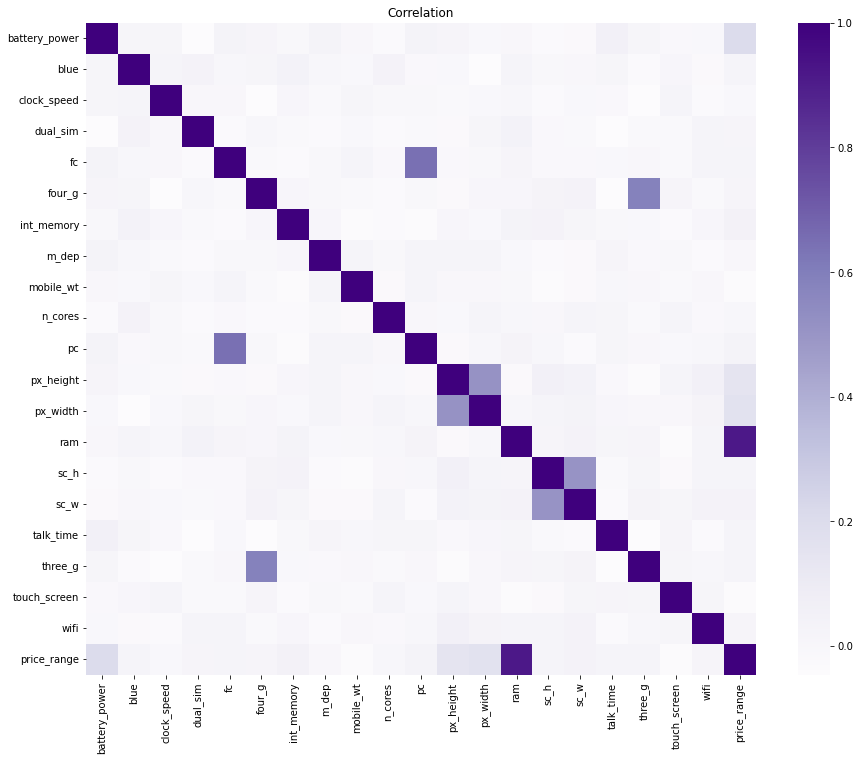

In [5]:
corr = df_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr,cmap = 'Purples')
r.set_title('Correlation')

As we can see our target price rangre has highly positive correlation with RAM

Also

3G and 4G

pc(Primary Camera mega pixels) and fc(Front Camera mega pixels)

px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height)

sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm)

features have highly positive correlation. For example as long as sc_w (screen width of mobile) increase, sc_h(screen height of mobile) is increasing.

In [6]:
corr.sort_values(by = ['price_range'], ascending = False)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
price_range,0.200723,0.020573,-0.006606,0.017444,0.021998,0.014772,0.044435,0.000853,-0.030302,0.004399,...,0.148858,0.165818,0.917046,0.022986,0.038711,0.021859,0.023611,-0.030411,0.018785,1.000000
ram,-0.000653,0.026351,0.003443,0.041072,0.015099,0.007313,0.032813,-0.009434,-0.002581,0.004868,...,-0.020352,0.004105,1.000000,0.015996,0.035576,0.010820,0.015795,-0.030455,0.022669,0.917046
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
px_width,-0.008402,-0.041533,-0.009476,0.014291,-0.005176,0.007448,-0.008335,0.023566,0.000090,0.024480,...,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.000350,-0.001628,0.030319,0.165818
px_height,0.014901,-0.006872,-0.014523,-0.020875,-0.009990,-0.019236,0.010441,0.025263,0.000939,-0.006872,...,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,-0.031174,0.021891,0.051824,0.148858
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
sc_w,-0.021421,0.000613,-0.007378,-0.016666,-0.012373,0.037005,0.011731,-0.018388,-0.020761,0.025826,...,0.043038,0.034699,0.035576,0.506144,1.000000,-0.022821,0.030941,0.012720,0.035423,0.038711
pc,0.031441,-0.009952,-0.005245,-0.017143,0.644595,-0.005598,-0.033273,0.026282,0.018844,-0.001193,...,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,-0.001322,-0.008742,0.005389,0.033599
three_g,0.011522,-0.030236,-0.046433,-0.014008,0.001793,0.584246,-0.009366,-0.012065,0.001551,-0.014733,...,-0.031174,0.000350,0.015795,0.012033,0.030941,-0.042688,1.000000,0.013917,0.004316,0.023611
sc_h,-0.029959,-0.002952,-0.029078,-0.011949,-0.011014,0.027166,0.037771,-0.025348,-0.033855,-0.000315,...,0.059615,0.021599,0.015996,1.000000,0.506144,-0.017335,0.012033,-0.020023,0.025929,0.022986


In [7]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


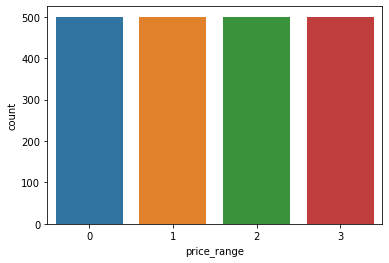

In [8]:
sns.countplot(df_train['price_range'])
plt.show()

In [9]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

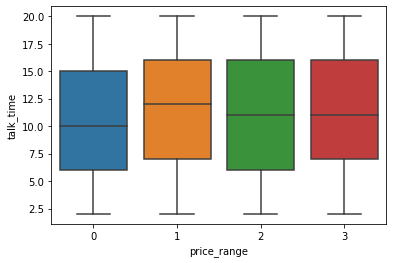

In [10]:
sns.boxplot(df_train['price_range'],df_train['talk_time'])

Phones that supports 3G

In [11]:
labels = ["3G-supported","Not supported"]
values = df_train['three_g'].value_counts().values  #0-1300, 1-700

<Figure size 720x720 with 0 Axes>

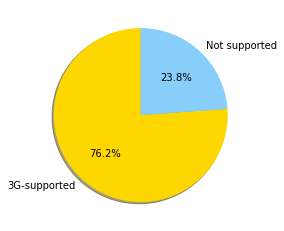

In [12]:
plt.figure(figsize = (10,10))
fig1,ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = colors)
plt.show()

Phones that supports 4G

<Figure size 720x720 with 0 Axes>

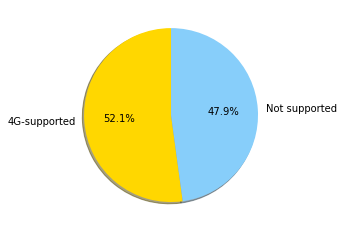

In [13]:
plt.figure(figsize = (10,10))
labels = ["4G-supported", "Not supported"]
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['gold', 'lightskyblue']
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

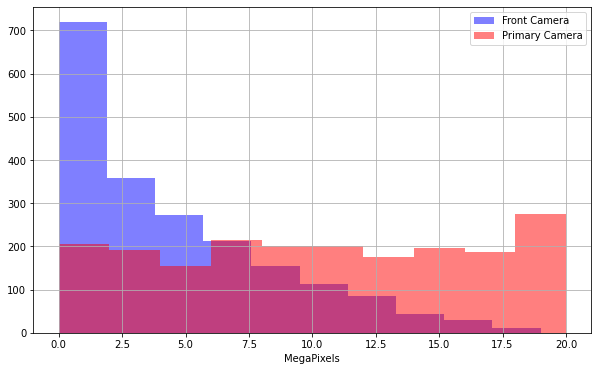

In [14]:
plt.figure(figsize = (10,6))
df_train['fc'].hist(alpha = 0.5, color = 'blue', label = 'Front Camera')
df_train['pc'].hist(alpha = 0.5, color = 'red',label = 'Primary Camera')
plt.legend()
plt.xlabel('MegaPixels')

In [15]:
scaler = StandardScaler()
x = df_train.drop('price_range', axis = 1)
y = df_train['price_range']   #0, 1, 2, 3 classification clusters

scaler.fit(x)
x_transformed = scaler.transform(x)
# transforming data into a standard scale 0-1

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size = 0.20)

In [16]:
# SVM

model = SVC()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train set Accuracy: ",accuracy_score(y_train_pred, y_train)*100)
print("Test set Accuracy: ", accuracy_score(y_test_pred, y_test)*100)
print("\nConfusion Matric: \n",confusion_matrix(y_test_pred, y_test))
print("\nClassification Report: \n",classification_report(y_test_pred, y_test))

Train set Accuracy:  98.6875
Test set Accuracy:  86.25

Confusion Matric: 
 [[105   8   0   0]
 [  6  78  11   0]
 [  0  16  78   7]
 [  0   0   7  84]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       113
           1       0.76      0.82      0.79        95
           2       0.81      0.77      0.79       101
           3       0.92      0.92      0.92        91

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

